### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

import numpy as np
import matplotlib.pyplot as plt

In [64]:
tf.__version__

'1.15.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [67]:
trainX.shape

(60000, 28, 28)

In [68]:
testX.shape

(10000, 28, 28)

In [69]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [71]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

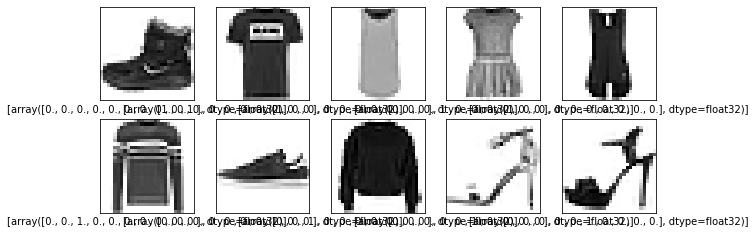

In [72]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel([trainY[i]])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Execute the model using model.fit()

In [76]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/sample - loss: 2042.9348 - acc: 0.7395 - val_loss: 1322.5660 - val_acc: 0.8007
Epoch 2/10
60000/60000 [==============================] - 3s 47us/sample - loss: 1618.8489 - acc: 0.7785 - val_loss: 1120.3458 - val_acc: 0.7964
Epoch 3/10
60000/60000 [==============================] - 3s 46us/sample - loss: 1542.2149 - acc: 0.7852 - val_loss: 2293.9175 - val_acc: 0.7482
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 1516.6174 - acc: 0.7891 - val_loss: 1664.2323 - val_acc: 0.7720
Epoch 5/10
60000/60000 [==============================] - 3s 45us/sample - loss: 1477.9776 - acc: 0.7936 - val_loss: 1654.0045 - val_acc: 0.7511
Epoch 6/10
60000/60000 [==============================] - 3s 44us/sample - loss: 1477.8829 - acc: 0.7952 - val_loss: 1013.6497 - val_acc: 0.8137
Epoch 7/10
60000/60000 [==============================] - 3s 53us/sample - loss:

In [77]:
test_loss, test_acc = model.evaluate(testX,  testY, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 1677.9315 - acc: 0.7655

Test accuracy: 0.7655


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

### Execute the model

In [80]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/sample - loss: 3.0216 - acc: 0.8438 - val_loss: 1.7251 - val_acc: 0.8230
Epoch 2/10
60000/60000 [==============================] - 3s 56us/sample - loss: 2.8450 - acc: 0.8174 - val_loss: 1.9137 - val_acc: 0.8098
Epoch 3/10
60000/60000 [==============================] - 3s 57us/sample - loss: 3.8355 - acc: 0.6662 - val_loss: 8.0510 - val_acc: 0.1008
Epoch 4/10
60000/60000 [==============================] - 3s 58us/sample - loss: 8.0572 - acc: 0.1006 - val_loss: 8.0510 - val_acc: 0.1008
Epoch 5/10
60000/60000 [==============================] - 3s 58us/sample - loss: 8.0572 - acc: 0.1006 - val_loss: 8.0510 - val_acc: 0.1008
Epoch 6/10
60000/60000 [==============================] - 3s 57us/sample - loss: 8.0569 - acc: 0.1006 - val_loss: 8.0510 - val_acc: 0.1008
Epoch 7/10
60000/60000 [==============================] - 3s 58us/sample - loss: 8.0572 - acc: 0.1006 - val_loss: 8.

In [81]:
test_loss, test_acc = model.evaluate(testX,  testY, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 8.0510 - acc: 0.1008

Test accuracy: 0.1008


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 61us/sample - loss: 8.0572 - acc: 0.1006 - val_loss: 8.0510 - val_acc: 0.1008
Epoch 2/10
60000/60000 [==============================] - 3s 56us/sample - loss: 8.0569 - acc: 0.1006 - val_loss: 8.0510 - val_acc: 0.1008
Epoch 3/10
60000/60000 [==============================] - 3s 57us/sample - loss: 8.0572 - acc: 0.1006 - val_loss: 8.0510 - val_acc: 0.1008
Epoch 4/10
60000/60000 [==============================] - 4s 70us/sample - loss: 8.0566 - acc: 0.1006 - val_loss: 8.0510 - val_acc: 0.1008
Epoch 5/10
60000/60000 [==============================] - 4s 61us/sample - loss: 8.0572 - acc: 0.1006 - val_loss: 8.0510 - val_acc: 0.1008
Epoch 6/10
60000/60000 [==============================] - 3s 56us/sample - loss: 8.0566 - acc: 0.1006 - val_loss: 8.0510 - val_acc: 0.1008
Epoch 7/10
60000/60000 [==============================] - 3s 58us/sample - loss: 8.0569 - acc: 0.1006 - val_loss: 8.

In [84]:
test_loss, test_acc = model.evaluate(testX,  testY, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 8.0510 - acc: 0.1008

Test accuracy: 0.1008


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [0]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [89]:
model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 72us/sample - loss: 2.3089 - acc: 0.1005 - val_loss: 2.3126 - val_acc: 0.1000
Epoch 2/10
60000/60000 [==============================] - 4s 64us/sample - loss: 2.3084 - acc: 0.1003 - val_loss: 2.3081 - val_acc: 0.0999
Epoch 3/10
60000/60000 [==============================] - 4s 64us/sample - loss: 2.3075 - acc: 0.1022 - val_loss: 2.3040 - val_acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 4s 62us/sample - loss: 2.3074 - acc: 0.0992 - val_loss: 2.3066 - val_acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 2.3074 - acc: 0.1003 - val_loss: 2.3045 - val_acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 2.3072 - acc: 0.0990 - val_loss: 2.3089 - val_acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 4s 65us/sample - loss: 2.3068 - acc: 0.1000 - val_loss: 2.

In [90]:
test_loss, test_acc = model.evaluate(testX,  testY, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 2.3075 - acc: 0.1000

Test accuracy: 0.1


## Review model

### Run the model